In [33]:
import pandas as pd
import numpy as np
import protfasta
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [4]:
# Function to read in SQL dumps as dataframe

def return_df(table_name):
    # Step 1: Read the text file
    file_path = '../data/SQLDumps/cisbp_2.00.' + table_name + '.sql'  # Change this to the path of your text file
    with open(file_path, 'r') as file:
        data = file.read()

    # Step 2: Extract the INSERT INTO values using regular expressions
    insert_pattern = r"INSERT INTO `" + table_name + "` VALUES (.*?);"
    matches = re.findall(insert_pattern, data, re.DOTALL)

    dfs = []
    
    for match in matches:
        # Get the matched values string
        values_string = match
        
        # Step 3: Split the values into individual entries
        values_list = values_string.split("),(")
    
        # Clean up the entries and prepare for DataFrame creation
        cleaned_values = [entry.strip("()") for entry in values_list]
    
        # Split each entry into individual columns
        final_data = [entry.split(',') for entry in cleaned_values]
        
        # Convert to a DataFrame
        df = pd.DataFrame(final_data)
        dfs.append(df)
        
    return pd.concat(dfs)


In [5]:
# All contents of prot_features database
prot_features = return_df('prot_features')
prot_features

,0,1,2,3,4,5
0,'PF000001_2.00','P000002_2.00','D08_2.00',46,137,'PTSRLQAPRFPLLKVIPEWVINHFGRNIVGSIKLEAPNGNIYDVG...
1,'PF000002_2.00','P000002_2.00','D08_2.00',194,293,'LVVLMKKSNVNHNFTLIIRKDYAREYFPPKNTTIILQLPGKSKHW...
2,'PF000003_2.00','P000002_2.00','D01_2.00',327,442,'KEEPIIDESTKTALTPRVKEEPTIDGTGVRHISNHIFSIHCPCQI...
3,'PF000004_2.00','P000002_2.00','D08_2.00',507,611,'VHKRGSPSPVFSSQYISRYLAEKYATGLTGVRGRRGAISLLLERD...
4,'PF000005_2.00','P000003_2.00','D08_2.00',231,323,'QAEKKAILPKPKEEYEYDNDGKKKKNKESHGLEVMAYDRTGEPYN...
...,...,...,...,...,...,...
4775,'PF993362_2.00','P436367_2.00','D89_2.00',25,63,'QACDRCRIKKIKCDGTLPSCTNCSKIGFVCKISDRLTRS'
4776,'PF993363_2.00','P436368_2.00','D89_2.00',14,51,'YNCGPCKRQKIKCDTNLPCSNCVKYKRVAKCYQEPPNP'
4777,'PF993364_2.00','P436369_2.00','D89_2.00',67,107,'KSCTRCRKHKIKCDFQERKPNACSMCSRKNVQCELEIIIPM'
4778,'PF993365_2.00','P436370_2.00','D89_2.00',303,323,'YTVGKPCSRCAKFNKKCEDAL'


In [53]:
# No nulls
prot_features.dropna()

,PFeature_ID,Protein_ID,Domain_ID,ProtFeature_FromPos,ProtFeature_ToPos,ProtFeature_Sequence
0,PF000001_2.00,P000002_2.00,D08_2.00,46,137,PTSRLQAPRFPLLKVIPEWVINHFGRNIVGSIKLEAPNGNIYDVGV...
1,PF000002_2.00,P000002_2.00,D08_2.00,194,293,LVVLMKKSNVNHNFTLIIRKDYAREYFPPKNTTIILQLPGKSKHWN...
2,PF000003_2.00,P000002_2.00,D01_2.00,327,442,KEEPIIDESTKTALTPRVKEEPTIDGTGVRHISNHIFSIHCPCQIH...
3,PF000004_2.00,P000002_2.00,D08_2.00,507,611,VHKRGSPSPVFSSQYISRYLAEKYATGLTGVRGRRGAISLLLERDG...
4,PF000005_2.00,P000003_2.00,D08_2.00,231,323,QAEKKAILPKPKEEYEYDNDGKKKKNKESHGLEVMAYDRTGEPYNL...
...,...,...,...,...,...,...
4775,PF993362_2.00,P436367_2.00,D89_2.00,25,63,QACDRCRIKKIKCDGTLPSCTNCSKIGFVCKISDRLTRS
4776,PF993363_2.00,P436368_2.00,D89_2.00,14,51,YNCGPCKRQKIKCDTNLPCSNCVKYKRVAKCYQEPPNP
4777,PF993364_2.00,P436369_2.00,D89_2.00,67,107,KSCTRCRKHKIKCDFQERKPNACSMCSRKNVQCELEIIIPM
4778,PF993365_2.00,P436370_2.00,D89_2.00,303,323,YTVGKPCSRCAKFNKKCEDAL


In [54]:
# Formatting
prot_features = prot_features.rename(columns = {0 : "PFeature_ID", 
                                                1: "Protein_ID", 
                                                2: "Domain_ID", 
                                                3: "ProtFeature_FromPos", 
                                                4: "ProtFeature_ToPos", 
                                                5 : "ProtFeature_Sequence"})
for col in prot_features.columns:
    prot_features[col] = prot_features[col].str.replace("'", "")

prot_features

,PFeature_ID,Protein_ID,Domain_ID,ProtFeature_FromPos,ProtFeature_ToPos,ProtFeature_Sequence
0,PF000001_2.00,P000002_2.00,D08_2.00,46,137,PTSRLQAPRFPLLKVIPEWVINHFGRNIVGSIKLEAPNGNIYDVGV...
1,PF000002_2.00,P000002_2.00,D08_2.00,194,293,LVVLMKKSNVNHNFTLIIRKDYAREYFPPKNTTIILQLPGKSKHWN...
2,PF000003_2.00,P000002_2.00,D01_2.00,327,442,KEEPIIDESTKTALTPRVKEEPTIDGTGVRHISNHIFSIHCPCQIH...
3,PF000004_2.00,P000002_2.00,D08_2.00,507,611,VHKRGSPSPVFSSQYISRYLAEKYATGLTGVRGRRGAISLLLERDG...
4,PF000005_2.00,P000003_2.00,D08_2.00,231,323,QAEKKAILPKPKEEYEYDNDGKKKKNKESHGLEVMAYDRTGEPYNL...
...,...,...,...,...,...,...
4775,PF993362_2.00,P436367_2.00,D89_2.00,25,63,QACDRCRIKKIKCDGTLPSCTNCSKIGFVCKISDRLTRS
4776,PF993363_2.00,P436368_2.00,D89_2.00,14,51,YNCGPCKRQKIKCDTNLPCSNCVKYKRVAKCYQEPPNP
4777,PF993364_2.00,P436369_2.00,D89_2.00,67,107,KSCTRCRKHKIKCDFQERKPNACSMCSRKNVQCELEIIIPM
4778,PF993365_2.00,P436370_2.00,D89_2.00,303,323,YTVGKPCSRCAKFNKKCEDAL


In [7]:
prot_features["Domain_ID"].value_counts()

Domain_ID
D14_2.00    577230
D52_2.00     47169
D40_2.00     45174
D89_2.00     36929
D11_2.00     29567
             ...  
D42_2.00       141
D85_2.00        78
D43_2.00        29
D17_2.00        16
D66_2.00         1
Name: count, Length: 89, dtype: int64

In [8]:
# Getting domain info
domains = return_df('domains')
domains = domains.rename(columns = {0 : "Domain_ID", 
                                                1: "Domain_Name", 
                                                2: "Pfam_Name", 
                                                3: "Pfam_DBID", 
                                                4: "Inter_DBID", 
                                                5 : "Domain_Type"})
for col in domains.columns:
    domains[col] = domains[col].str.replace("'", "")
domains

,Domain_ID,Domain_Name,Pfam_Name,Pfam_DBID,Inter_DBID,Domain_Type
0,D01_2.00,ABF1,BAF1_ABF1,PF04684,IPR006774,DBD
1,D02_2.00,AFT,AFT,PF08731,IPR014842,DBD
2,D03_2.00,AP2,AP2,PF00847,IPR001471,DBD
3,D04_2.00,AP-2,TF_AP-2,PF03299,IPR013854,DBD
4,D05_2.00,APSES,KilA-N,PF04383,IPR018004,DBD
...,...,...,...,...,...,...
84,D85_2.00,VHR1,Vhr1,PF04001,IPR007147,DBD
85,D86_2.00,Whirly,Whirly,PF08536,IPR013742,DBD
86,D87_2.00,WRC,WRC,PF08879,IPR014977,DBD
87,D88_2.00,WRKY,WRKY,PF03106,IPR003657,DBD


In [9]:
# Merging so each prot feature has more domain info
prot_features_with_domain_info = pd.merge(prot_features, domains, on = "Domain_ID")
prot_features_with_domain_info

,PFeature_ID,Protein_ID,Domain_ID,ProtFeature_FromPos,ProtFeature_ToPos,ProtFeature_Sequence,Domain_Name,Pfam_Name,Pfam_DBID,Inter_DBID,Domain_Type
0,PF000001_2.00,P000002_2.00,D08_2.00,46,137,PTSRLQAPRFPLLKVIPEWVINHFGRNIVGSIKLEAPNGNIYDVGV...,B3,B3,PF02362,IPR003340,DBD
1,PF000002_2.00,P000002_2.00,D08_2.00,194,293,LVVLMKKSNVNHNFTLIIRKDYAREYFPPKNTTIILQLPGKSKHWN...,B3,B3,PF02362,IPR003340,DBD
2,PF000003_2.00,P000002_2.00,D01_2.00,327,442,KEEPIIDESTKTALTPRVKEEPTIDGTGVRHISNHIFSIHCPCQIH...,ABF1,BAF1_ABF1,PF04684,IPR006774,DBD
3,PF000004_2.00,P000002_2.00,D08_2.00,507,611,VHKRGSPSPVFSSQYISRYLAEKYATGLTGVRGRRGAISLLLERDG...,B3,B3,PF02362,IPR003340,DBD
4,PF000005_2.00,P000003_2.00,D08_2.00,231,323,QAEKKAILPKPKEEYEYDNDGKKKKNKESHGLEVMAYDRTGEPYNL...,B3,B3,PF02362,IPR003340,DBD
...,...,...,...,...,...,...,...,...,...,...,...
993361,PF993362_2.00,P436367_2.00,D89_2.00,25,63,QACDRCRIKKIKCDGTLPSCTNCSKIGFVCKISDRLTRS,Zinc cluster,Zn_clus,PF00172,IPR001138,DBD
993362,PF993363_2.00,P436368_2.00,D89_2.00,14,51,YNCGPCKRQKIKCDTNLPCSNCVKYKRVAKCYQEPPNP,Zinc cluster,Zn_clus,PF00172,IPR001138,DBD
993363,PF993364_2.00,P436369_2.00,D89_2.00,67,107,KSCTRCRKHKIKCDFQERKPNACSMCSRKNVQCELEIIIPM,Zinc cluster,Zn_clus,PF00172,IPR001138,DBD
993364,PF993365_2.00,P436370_2.00,D89_2.00,303,323,YTVGKPCSRCAKFNKKCEDAL,Zinc cluster,Zn_clus,PF00172,IPR001138,DBD


In [10]:
# Now, looking for matches in most up to date Lambert TFs sequences
lambert_table_s1 = pd.read_excel(open('../data/lambert_supp_tables.xlsx', 'rb'),
                               sheet_name='Table S1. Related to Figure 1B')
lambert_table_s1_TF_rows = lambert_table_s1[lambert_table_s1["Is TF?"] == "Yes"]
lambert_TF_ensg_codes = lambert_table_s1_TF_rows["Gene Information"]
lambert_TF_ensg_codes

1       ENSG00000137203
2       ENSG00000008196
3       ENSG00000087510
4       ENSG00000008197
5       ENSG00000116819
             ...       
2760    ENSG00000177683
2761    ENSG00000174796
2762    ENSG00000184436
2763    ENSG00000161277
2764    ENSG00000168152
Name: Gene Information, Length: 1639, dtype: object

In [11]:
# Saving ensg to upload to uniprot
lambert_TF_ensg_codes.to_csv("../data/lambert_TF_ensg.csv", index = None, header = None)

In [15]:
# From uniprot, downloading lambert TF canonical fasta
lambert_TFs = protfasta.read_fasta("../data/lambert_TFs_10-21-24.fasta")
lambert_TFs = pd.DataFrame({"id" : lambert_TFs.keys(), "ProteinSeq" : lambert_TFs.values()})
lambert_TFs

,id,ProteinSeq
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...
1,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFGPLTTPT...
2,sp|A0PJY2|FEZF1_HUMAN Fez family zinc finger p...,MDSSCHNATTKMLATAPARGNMMSTSKPLAFSIERIMARTPEPKAL...
3,sp|A1A519|F170A_HUMAN Protein FAM170A OS=Homo ...,MKRRQKRKHLENEESQETAEKGGGMSKSQEDALQPGSTRVAKGWSQ...
4,sp|A1YPR0|ZBT7C_HUMAN Zinc finger and BTB doma...,MANDIDELIGIPFPNHSSEVLCSLNEQRHDGLLCDVLLVVQEQEYR...
...,...,...
1608,sp|Q9Y6Q9|NCOA3_HUMAN Nuclear receptor coactiv...,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...
1609,sp|Q9Y6R6|Z780B_HUMAN Zinc finger protein 780B...,MVHGSVTFRDVAIDFSQEEWECLQPDQRTLYRDVMLENYSHLISLG...
1610,sp|Q9Y6X0|SETBP_HUMAN SET-binding protein OS=H...,MESRETLSSSRQRGGESDFLPVSSAKPPAAPGCAGEPLLSTPGPGK...
1611,sp|Q9Y6X8|ZHX2_HUMAN Zinc fingers and homeobox...,MASKRKSTTPCMVRTSQVVEQDVPEEVDRAKEKGIGTPQPDVAKDS...


In [25]:
# Saving unique DBDs
unique_DBDs = prot_features_with_domain_info[["ProtFeature_Sequence"]].drop_duplicates()
unique_DBDs

,ProtFeature_Sequence
0,PTSRLQAPRFPLLKVIPEWVINHFGRNIVGSIKLEAPNGNIYDVGV...
1,LVVLMKKSNVNHNFTLIIRKDYAREYFPPKNTTIILQLPGKSKHWN...
2,KEEPIIDESTKTALTPRVKEEPTIDGTGVRHISNHIFSIHCPCQIH...
3,VHKRGSPSPVFSSQYISRYLAEKYATGLTGVRGRRGAISLLLERDG...
4,QAEKKAILPKPKEEYEYDNDGKKKKNKESHGLEVMAYDRTGEPYNL...
...,...
993305,LSCVPCHQRKIKCSRDQPACSNCLKNNWDCVYFLNDRI
993306,LGCTECKRRKVKCDETKPMCWQCSHLGKNCVYSSPSTRI
993307,FACQSCRKRKRKCDRKKPVCERCKRLGVPCVYELPPKHL
993364,YTVGKPCSRCAKFNKKCEDAL


In [23]:
# For row in Lambert TFs, look for a match to a DBD sequence

In [29]:
# Slow to run
# Iterating through all TFs and for each, through all DBDs to look for matches. Saving matching substrings

DBD_matches_col = []

i = 0
for TF_seq in lambert_TFs["ProteinSeq"]:
    DBD_matches = []
    
    for DBD_seq in unique_DBDs["ProtFeature_Sequence"]:
        if DBD_seq in TF_seq:
            DBD_matches.append(DBD_seq)

    DBD_matches_col.append(DBD_matches)
    if (i%100) == 0:
        print(i)
    i += 1

lambert_TFs["DBD_matches"] = DBD_matches_col
lambert_TFs

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


,id,ProteinSeq,DBD_matches
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,"[WKCNECEKAFSYYSAFVLHQRIH, YECNECGKAFSQSIHLTLHQ..."
1,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFGPLTTPT...,[KEKSLGLLCHKFLARYPNYPNPAVNNDICLDEVAEELNVERRRIY...
2,sp|A0PJY2|FEZF1_HUMAN Fez family zinc finger p...,MDSSCHNATTKMLATAPARGNMMSTSKPLAFSIERIMARTPEPKAL...,"[FVCEFCGKGFHQKGNYKNHKLTH, FVCKVCGKGFRQASTLCRHK..."
3,sp|A1A519|F170A_HUMAN Protein FAM170A OS=Homo ...,MKRRQKRKHLENEESQETAEKGGGMSKSQEDALQPGSTRVAKGWSQ...,[MKRRQKRKHLENEESQETAEKGGGMSKSQEDALQPGSTRVAKGWS...
4,sp|A1YPR0|ZBT7C_HUMAN Zinc finger and BTB doma...,MANDIDELIGIPFPNHSSEVLCSLNEQRHDGLLCDVLLVVQEQEYR...,"[YLCIHCNAKFVHNYDLKNHMRIH, QQCPICHKVIMGAGKLPRHM..."
...,...,...,...
1608,sp|Q9Y6Q9|NCOA3_HUMAN Nuclear receptor coactiv...,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...,[SGEKRRREQESKYIEELAELISANLSDIDNFNVKPDKCAILKETV...
1609,sp|Q9Y6R6|Z780B_HUMAN Zinc finger protein 780B...,MVHGSVTFRDVAIDFSQEEWECLQPDQRTLYRDVMLENYSHLISLG...,"[YECKECGKAF, YQCKECGKAFNRGSNLIQHQKIH, FVCRECEM..."
1610,sp|Q9Y6X0|SETBP_HUMAN SET-binding protein OS=H...,MESRETLSSSRQRGGESDFLPVSSAKPPAAPGCAGEPLLSTPGPGK...,"[VKKKRGRPKKQPL, SKKKRGRPAKTND, VKKRRGRPRKQPT, ..."
1611,sp|Q9Y6X8|ZHX2_HUMAN Zinc fingers and homeobox...,MASKRKSTTPCMVRTSQVVEQDVPEEVDRAKEKGIGTPQPDVAKDS...,[DTNATMINSFNKFPYPTQAELSWLTAASKHPEEHIRIWFATQRLK...


In [31]:
# How many matching?
lambert_TFs["num_DBD_matches"] = [len(_) for _ in lambert_TFs["DBD_matches"]]
lambert_TFs

,id,ProteinSeq,DBD_matches,num_DBD_matches
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,"[WKCNECEKAFSYYSAFVLHQRIH, YECNECGKAFSQSIHLTLHQ...",18
1,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFGPLTTPT...,[KEKSLGLLCHKFLARYPNYPNPAVNNDICLDEVAEELNVERRRIY...,2
2,sp|A0PJY2|FEZF1_HUMAN Fez family zinc finger p...,MDSSCHNATTKMLATAPARGNMMSTSKPLAFSIERIMARTPEPKAL...,"[FVCEFCGKGFHQKGNYKNHKLTH, FVCKVCGKGFRQASTLCRHK...",8
3,sp|A1A519|F170A_HUMAN Protein FAM170A OS=Homo ...,MKRRQKRKHLENEESQETAEKGGGMSKSQEDALQPGSTRVAKGWSQ...,[MKRRQKRKHLENEESQETAEKGGGMSKSQEDALQPGSTRVAKGWS...,2
4,sp|A1YPR0|ZBT7C_HUMAN Zinc finger and BTB doma...,MANDIDELIGIPFPNHSSEVLCSLNEQRHDGLLCDVLLVVQEQEYR...,"[YLCIHCNAKFVHNYDLKNHMRIH, QQCPICHKVIMGAGKLPRHM...",5
...,...,...,...,...
1608,sp|Q9Y6Q9|NCOA3_HUMAN Nuclear receptor coactiv...,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...,[SGEKRRREQESKYIEELAELISANLSDIDNFNVKPDKCAILKETV...,2
1609,sp|Q9Y6R6|Z780B_HUMAN Zinc finger protein 780B...,MVHGSVTFRDVAIDFSQEEWECLQPDQRTLYRDVMLENYSHLISLG...,"[YECKECGKAF, YQCKECGKAFNRGSNLIQHQKIH, FVCRECEM...",26
1610,sp|Q9Y6X0|SETBP_HUMAN SET-binding protein OS=H...,MESRETLSSSRQRGGESDFLPVSSAKPPAAPGCAGEPLLSTPGPGK...,"[VKKKRGRPKKQPL, SKKKRGRPAKTND, VKKRRGRPRKQPT, ...",4
1611,sp|Q9Y6X8|ZHX2_HUMAN Zinc fingers and homeobox...,MASKRKSTTPCMVRTSQVVEQDVPEEVDRAKEKGIGTPQPDVAKDS...,[DTNATMINSFNKFPYPTQAELSWLTAASKHPEEHIRIWFATQRLK...,8


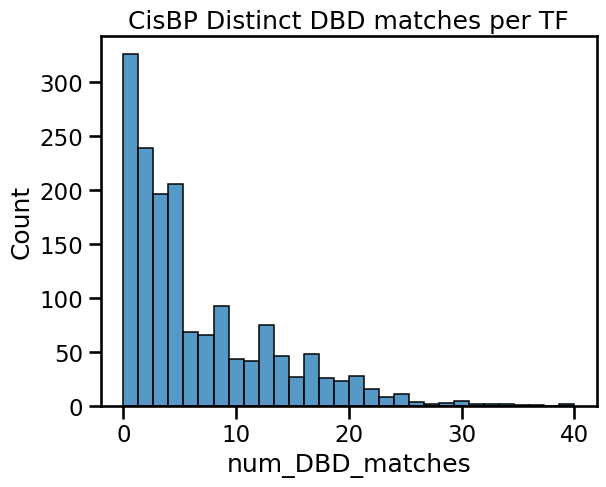

In [146]:
sns.histplot(lambert_TFs["num_DBD_matches"])
plt.xlabel("DBDs")
plt.title("CisBP Distinct DBD matches per TF");

In [58]:
# Splitting into one row per DBD
lambert_TFs_exploded = lambert_TFs.explode("DBD_matches")
lambert_TFs_exploded = lambert_TFs_exploded.dropna()
lambert_TFs_exploded = lambert_TFs_exploded.reset_index(drop = True)
lambert_TFs_exploded

,id,ProteinSeq,DBD_matches,num_DBD_matches
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,WKCNECEKAFSYYSAFVLHQRIH,18
1,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFSQSIHLTLHQRIH,18
2,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECHECGKAFSHRSALIRHHIIH,18
3,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFNQSSYLTQHQRIH,18
4,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFSQSTFLTQHQVIH,18
...,...,...,...,...
10659,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,EIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKKVKYRKDGYCW...,7
10660,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,KERHRWNTNEEIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKK...,7
10661,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,CLYGCYVHSSIIPTFHRRCYWLLQNPDIVLVHYLNV,7
10662,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,TFHRRCYWLLQNPDIVLVHYLNV,7


In [78]:
# Using substring and full protein sequence to add starts and ends
starts = []
#ends = []


for i in lambert_TFs_exploded.index:
    row =  lambert_TFs_exploded.iloc[i]
    #print(row)
    start = row["ProteinSeq"].index(row["DBD_matches"]) + 1
    starts.append(start)

lambert_TFs_exploded["ProtFeature_FromPos"] = starts
lambert_TFs_exploded["DBD_len"] = lambert_TFs_exploded["DBD_matches"].str.len()
lambert_TFs_exploded["ProtFeature_ToPos"] = lambert_TFs_exploded["ProtFeature_FromPos"] + lambert_TFs_exploded["DBD_len"] - 1
lambert_TFs_exploded

,id,ProteinSeq,DBD_matches,num_DBD_matches,ProtFeature_FromPos,DBD_len,ProtFeature_ToPos
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,WKCNECEKAFSYYSAFVLHQRIH,18,221,23,243
1,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFSQSIHLTLHQRIH,18,249,23,271
2,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECHECGKAFSHRSALIRHHIIH,18,277,23,299
3,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFNQSSYLTQHQRIH,18,305,23,327
4,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFSQSTFLTQHQVIH,18,333,23,355
...,...,...,...,...,...,...,...
10659,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,EIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKKVKYRKDGYCW...,7,79,104,182
10660,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,KERHRWNTNEEIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKK...,7,69,114,182
10661,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,CLYGCYVHSSIIPTFHRRCYWLLQNPDIVLVHYLNV,7,147,36,182
10662,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,TFHRRCYWLLQNPDIVLVHYLNV,7,160,23,182


In [79]:
# Casting as ints
prot_features_with_domain_info["ProtFeature_FromPos"] = prot_features_with_domain_info["ProtFeature_FromPos"].astype(int)
prot_features_with_domain_info["ProtFeature_ToPos"] = prot_features_with_domain_info["ProtFeature_ToPos"].astype(int)
prot_features_with_domain_info

,PFeature_ID,Protein_ID,Domain_ID,ProtFeature_FromPos,ProtFeature_ToPos,ProtFeature_Sequence,Domain_Name,Pfam_Name,Pfam_DBID,Inter_DBID,Domain_Type
0,PF000001_2.00,P000002_2.00,D08_2.00,46,137,PTSRLQAPRFPLLKVIPEWVINHFGRNIVGSIKLEAPNGNIYDVGV...,B3,B3,PF02362,IPR003340,DBD
1,PF000002_2.00,P000002_2.00,D08_2.00,194,293,LVVLMKKSNVNHNFTLIIRKDYAREYFPPKNTTIILQLPGKSKHWN...,B3,B3,PF02362,IPR003340,DBD
2,PF000003_2.00,P000002_2.00,D01_2.00,327,442,KEEPIIDESTKTALTPRVKEEPTIDGTGVRHISNHIFSIHCPCQIH...,ABF1,BAF1_ABF1,PF04684,IPR006774,DBD
3,PF000004_2.00,P000002_2.00,D08_2.00,507,611,VHKRGSPSPVFSSQYISRYLAEKYATGLTGVRGRRGAISLLLERDG...,B3,B3,PF02362,IPR003340,DBD
4,PF000005_2.00,P000003_2.00,D08_2.00,231,323,QAEKKAILPKPKEEYEYDNDGKKKKNKESHGLEVMAYDRTGEPYNL...,B3,B3,PF02362,IPR003340,DBD
...,...,...,...,...,...,...,...,...,...,...,...
993361,PF993362_2.00,P436367_2.00,D89_2.00,25,63,QACDRCRIKKIKCDGTLPSCTNCSKIGFVCKISDRLTRS,Zinc cluster,Zn_clus,PF00172,IPR001138,DBD
993362,PF993363_2.00,P436368_2.00,D89_2.00,14,51,YNCGPCKRQKIKCDTNLPCSNCVKYKRVAKCYQEPPNP,Zinc cluster,Zn_clus,PF00172,IPR001138,DBD
993363,PF993364_2.00,P436369_2.00,D89_2.00,67,107,KSCTRCRKHKIKCDFQERKPNACSMCSRKNVQCELEIIIPM,Zinc cluster,Zn_clus,PF00172,IPR001138,DBD
993364,PF993365_2.00,P436370_2.00,D89_2.00,303,323,YTVGKPCSRCAKFNKKCEDAL,Zinc cluster,Zn_clus,PF00172,IPR001138,DBD


In [83]:
# Merging exploded rows with the protein info to add info where DBD seq, start, and end match
lambert_TFs_exploded_merged = pd.merge(lambert_TFs_exploded, prot_features_with_domain_info, left_on = ["DBD_matches", "ProtFeature_FromPos", "ProtFeature_ToPos"],
        right_on = ["ProtFeature_Sequence", "ProtFeature_FromPos", "ProtFeature_ToPos"], how = "left")
lambert_TFs_exploded_merged

,id,ProteinSeq,DBD_matches,num_DBD_matches,ProtFeature_FromPos,DBD_len,ProtFeature_ToPos,PFeature_ID,Protein_ID,Domain_ID,ProtFeature_Sequence,Domain_Name,Pfam_Name,Pfam_DBID,Inter_DBID,Domain_Type
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,WKCNECEKAFSYYSAFVLHQRIH,18,221,23,243,PF264365_2.00,P108598_2.00,D14_2.00,WKCNECEKAFSYYSAFVLHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
1,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFSQSIHLTLHQRIH,18,249,23,271,PF264366_2.00,P108598_2.00,D14_2.00,YECNECGKAFSQSIHLTLHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
2,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECHECGKAFSHRSALIRHHIIH,18,277,23,299,PF264367_2.00,P108598_2.00,D14_2.00,YECHECGKAFSHRSALIRHHIIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
3,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFNQSSYLTQHQRIH,18,305,23,327,PF264368_2.00,P108598_2.00,D14_2.00,YECNECGKAFNQSSYLTQHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
4,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFSQSTFLTQHQVIH,18,333,23,355,PF264369_2.00,P108598_2.00,D14_2.00,YECNECGKAFSQSTFLTQHQVIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59040,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,KERHRWNTNEEIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKK...,7,69,114,182,PF686968_2.00,P182129_2.00,D19_2.00,KERHRWNTNEEIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKK...,CG-1,CG-1,PF03859,IPR005559,DBD
59041,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,KERHRWNTNEEIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKK...,7,69,114,182,PF687001_2.00,P182162_2.00,D19_2.00,KERHRWNTNEEIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKK...,CG-1,CG-1,PF03859,IPR005559,DBD
59042,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,CLYGCYVHSSIIPTFHRRCYWLLQNPDIVLVHYLNV,7,147,36,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59043,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,TFHRRCYWLLQNPDIVLVHYLNV,7,160,23,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Around 2000 do not have a perfect start/end match
lambert_TFs_exploded_merged[lambert_TFs_exploded_merged["ProtFeature_Sequence"].isna()]

,id,ProteinSeq,DBD_matches,num_DBD_matches,ProtFeature_FromPos,DBD_len,ProtFeature_ToPos,PFeature_ID,Protein_ID,Domain_ID,ProtFeature_Sequence,Domain_Name,Pfam_Name,Pfam_DBID,Inter_DBID,Domain_Type
10,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,GKAFSQSIHLTLHQRIH,18,255,17,271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YKCKECGKAF,18,473,10,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YKCNECGKAFSDRSG,18,361,15,375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAF,18,249,10,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YKCNECGKAFS,18,361,11,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59034,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,MILYNRKKVKYRKDGYCWKKRKDGKTTREDHMKLKVQGVECLYGCY...,7,107,76,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59035,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,EIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKKVKYRKDGYCW...,7,79,104,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59042,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,CLYGCYVHSSIIPTFHRRCYWLLQNPDIVLVHYLNV,7,147,36,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59043,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,TFHRRCYWLLQNPDIVLVHYLNV,7,160,23,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
prot_features_with_domain_info[prot_features_with_domain_info["ProtFeature_Sequence"] == "GKAFSQSIHLTLHQRIH"]

,PFeature_ID,Protein_ID,Domain_ID,ProtFeature_FromPos,ProtFeature_ToPos,ProtFeature_Sequence,Domain_Name,Pfam_Name,Pfam_DBID,Inter_DBID,Domain_Type
241567,PF241568_2.00,P105783_2.00,D14_2.00,1,17,GKAFSQSIHLTLHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
291856,PF291857_2.00,P112370_2.00,D14_2.00,1,17,GKAFSQSIHLTLHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD


In [90]:
lambert_TFs_exploded_merged[lambert_TFs_exploded_merged["DBD_matches"] == "GKAFSQSIHLTLHQRIH"]

,id,ProteinSeq,DBD_matches,num_DBD_matches,ProtFeature_FromPos,DBD_len,ProtFeature_ToPos,PFeature_ID,Protein_ID,Domain_ID,ProtFeature_Sequence,Domain_Name,Pfam_Name,Pfam_DBID,Inter_DBID,Domain_Type
10,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,GKAFSQSIHLTLHQRIH,18,255,17,271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
lambert_TFs_exploded_merged[["id", "Pfam_DBID"]].drop_duplicates().value_counts("id")

id
sp|Q63HK3|ZKSC2_HUMAN Zinc finger protein with KRAB and SCAN domains 2 OS=Homo sapiens OX=9606 GN=ZKSCAN2 PE=1 SV=2    4
sp|P20265|PO3F2_HUMAN POU domain, class 3, transcription factor 2 OS=Homo sapiens OX=9606 GN=POU3F2 PE=1 SV=4          3
sp|Q01826|SATB1_HUMAN DNA-binding protein SATB1 OS=Homo sapiens OX=9606 GN=SATB1 PE=1 SV=1                             3
sp|P14859|PO2F1_HUMAN POU domain, class 2, transcription factor 1 OS=Homo sapiens OX=9606 GN=POU2F1 PE=1 SV=2          3
sp|Q03052|PO3F1_HUMAN POU domain, class 3, transcription factor 1 OS=Homo sapiens OX=9606 GN=POU3F1 PE=1 SV=3          3
                                                                                                                      ..
sp|Q92782|DPF1_HUMAN Zinc finger protein neuro-d4 OS=Homo sapiens OX=9606 GN=DPF1 PE=1 SV=3                            1
sp|Q92784|DPF3_HUMAN Zinc finger protein DPF3 OS=Homo sapiens OX=9606 GN=DPF3 PE=1 SV=3                                1
sp|P55347|PKNX1_HUMAN Homeobo

In [95]:
lambert_TFs_exploded_merged[lambert_TFs_exploded_merged["id"] == "sp|Q63HK3|ZKSC2_HUMAN Zinc finger protein with KRAB and SCAN domains 2 OS=Homo sapiens OX=9606 GN=ZKSCAN2 PE=1 SV=2"]

,id,ProteinSeq,DBD_matches,num_DBD_matches,ProtFeature_FromPos,DBD_len,ProtFeature_ToPos,PFeature_ID,Protein_ID,Domain_ID,ProtFeature_Sequence,Domain_Name,Pfam_Name,Pfam_DBID,Inter_DBID,Domain_Type
27028,sp|Q63HK3|ZKSC2_HUMAN Zinc finger protein with...,MAVALDSQIDAPLEVEGCLIMKVEKDPEWASEPILEGSDSSETFRK...,TRFYEALQACHRKSKLYGAVAEQLRECGFLRTPEQCRTKFKSLQKS...,12,515,68,582,PF108074_2.00,P086260_2.00,D47_2.00,TRFYEALQACHRKSKLYGAVAEQLRECGFLRTPEQCRTKFKSLQKS...,MADF,MADF_DNA_bdg,PF10545,IPR006578,DBD
27029,sp|Q63HK3|ZKSC2_HUMAN Zinc finger protein with...,MAVALDSQIDAPLEVEGCLIMKVEKDPEWASEPILEGSDSSETFRK...,TRFYEALQACHRKSKLYGAVAEQLRECGFLRTPEQCRTKFKSLQKS...,12,515,68,582,PF108339_2.00,P086296_2.00,D47_2.00,TRFYEALQACHRKSKLYGAVAEQLRECGFLRTPEQCRTKFKSLQKS...,MADF,MADF_DNA_bdg,PF10545,IPR006578,DBD
27030,sp|Q63HK3|ZKSC2_HUMAN Zinc finger protein with...,MAVALDSQIDAPLEVEGCLIMKVEKDPEWASEPILEGSDSSETFRK...,TRFYEALQACHRKSKLYGAVAEQLRECGFLRTPEQCRTKFKSLQKS...,12,515,68,582,PF108347_2.00,P086297_2.00,D47_2.00,TRFYEALQACHRKSKLYGAVAEQLRECGFLRTPEQCRTKFKSLQKS...,MADF,MADF_DNA_bdg,PF10545,IPR006578,DBD
27031,sp|Q63HK3|ZKSC2_HUMAN Zinc finger protein with...,MAVALDSQIDAPLEVEGCLIMKVEKDPEWASEPILEGSDSSETFRK...,FKCLDCGKSFNDSSNFGAHQRIH,12,803,23,825,PF107948_2.00,P086241_2.00,D14_2.00,FKCLDCGKSFNDSSNFGAHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
27032,sp|Q63HK3|ZKSC2_HUMAN Zinc finger protein with...,MAVALDSQIDAPLEVEGCLIMKVEKDPEWASEPILEGSDSSETFRK...,FKCLDCGKSFNDSSNFGAHQRIH,12,803,23,825,PF107960_2.00,P086243_2.00,D14_2.00,FKCLDCGKSFNDSSNFGAHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27084,sp|Q63HK3|ZKSC2_HUMAN Zinc finger protein with...,MAVALDSQIDAPLEVEGCLIMKVEKDPEWASEPILEGSDSSETFRK...,YKCGVCGKCFGRSRSLIRHQRIH,12,775,23,797,PF110087_2.00,P086521_2.00,D14_2.00,YKCGVCGKCFGRSRSLIRHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
27085,sp|Q63HK3|ZKSC2_HUMAN Zinc finger protein with...,MAVALDSQIDAPLEVEGCLIMKVEKDPEWASEPILEGSDSSETFRK...,ETLQACPRNSQVYGAVAEWLRECGFLRTPEQCRTKFKSLQKSYRKV...,12,362,61,422,PF107981_2.00,P086246_2.00,D47_2.00,ETLQACPRNSQVYGAVAEWLRECGFLRTPEQCRTKFKSLQKSYRKV...,MADF,MADF_DNA_bdg,PF10545,IPR006578,DBD
27086,sp|Q63HK3|ZKSC2_HUMAN Zinc finger protein with...,MAVALDSQIDAPLEVEGCLIMKVEKDPEWASEPILEGSDSSETFRK...,FKCLDCGKSFNDSSNFGAHQ,12,803,20,822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27087,sp|Q63HK3|ZKSC2_HUMAN Zinc finger protein with...,MAVALDSQIDAPLEVEGCLIMKVEKDPEWASEPILEGSDSSETFRK...,VHWSYEETKTFLAILKESRFYETLQACPRNSQVYGAVAEWLRECGF...,12,341,61,401,PF110085_2.00,P086521_2.00,D52_2.00,VHWSYEETKTFLAILKESRFYETLQACPRNSQVYGAVAEWLRECGF...,Myb,Myb_DNA-binding,PF00249,IPR014778,DBD


In [102]:
# Dropping duplicate entries
lambert_TFs_exploded_merged = lambert_TFs_exploded_merged.drop_duplicates(subset = ["DBD_matches", "ProtFeature_FromPos", "ProtFeature_ToPos"])
lambert_TFs_exploded_merged

,id,ProteinSeq,DBD_matches,num_DBD_matches,ProtFeature_FromPos,DBD_len,ProtFeature_ToPos,PFeature_ID,Protein_ID,Domain_ID,ProtFeature_Sequence,Domain_Name,Pfam_Name,Pfam_DBID,Inter_DBID,Domain_Type
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,WKCNECEKAFSYYSAFVLHQRIH,18,221,23,243,PF264365_2.00,P108598_2.00,D14_2.00,WKCNECEKAFSYYSAFVLHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
1,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFSQSIHLTLHQRIH,18,249,23,271,PF264366_2.00,P108598_2.00,D14_2.00,YECNECGKAFSQSIHLTLHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
2,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECHECGKAFSHRSALIRHHIIH,18,277,23,299,PF264367_2.00,P108598_2.00,D14_2.00,YECHECGKAFSHRSALIRHHIIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
3,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFNQSSYLTQHQRIH,18,305,23,327,PF264368_2.00,P108598_2.00,D14_2.00,YECNECGKAFNQSSYLTQHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
4,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFSQSTFLTQHQVIH,18,333,23,355,PF264369_2.00,P108598_2.00,D14_2.00,YECNECGKAFSQSTFLTQHQVIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59035,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,EIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKKVKYRKDGYCW...,7,79,104,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59036,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,KERHRWNTNEEIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKK...,7,69,114,182,PF686920_2.00,P182081_2.00,D19_2.00,KERHRWNTNEEIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKK...,CG-1,CG-1,PF03859,IPR005559,DBD
59042,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,CLYGCYVHSSIIPTFHRRCYWLLQNPDIVLVHYLNV,7,147,36,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59043,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,TFHRRCYWLLQNPDIVLVHYLNV,7,160,23,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# Same number remains without matches
lambert_TFs_exploded_merged[lambert_TFs_exploded_merged["ProtFeature_Sequence"].isna()]

,id,ProteinSeq,DBD_matches,num_DBD_matches,ProtFeature_FromPos,DBD_len,ProtFeature_ToPos,PFeature_ID,Protein_ID,Domain_ID,ProtFeature_Sequence,Domain_Name,Pfam_Name,Pfam_DBID,Inter_DBID,Domain_Type
10,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,GKAFSQSIHLTLHQRIH,18,255,17,271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YKCKECGKAF,18,473,10,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YKCNECGKAFSDRSG,18,361,15,375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAF,18,249,10,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YKCNECGKAFS,18,361,11,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59034,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,MILYNRKKVKYRKDGYCWKKRKDGKTTREDHMKLKVQGVECLYGCY...,7,107,76,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59035,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,EIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKKVKYRKDGYCW...,7,79,104,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59042,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,CLYGCYVHSSIIPTFHRRCYWLLQNPDIVLVHYLNV,7,147,36,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59043,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,TFHRRCYWLLQNPDIVLVHYLNV,7,160,23,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Saving as intervals
lambert_TFs_exploded_merged["DBD_coords"] = list(zip(lambert_TFs_exploded_merged["ProtFeature_FromPos"],
                                                           lambert_TFs_exploded_merged["ProtFeature_ToPos"]))
lambert_TFs_exploded_merged

/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_1289/2408933276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lambert_TFs_exploded_merged["DBD_coords"] = list(zip(lambert_TFs_exploded_merged["ProtFeature_FromPos"],


,id,ProteinSeq,DBD_matches,num_DBD_matches,ProtFeature_FromPos,DBD_len,ProtFeature_ToPos,PFeature_ID,Protein_ID,Domain_ID,ProtFeature_Sequence,Domain_Name,Pfam_Name,Pfam_DBID,Inter_DBID,Domain_Type,DBD_coords
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,WKCNECEKAFSYYSAFVLHQRIH,18,221,23,243,PF264365_2.00,P108598_2.00,D14_2.00,WKCNECEKAFSYYSAFVLHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD,"(221, 243)"
1,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFSQSIHLTLHQRIH,18,249,23,271,PF264366_2.00,P108598_2.00,D14_2.00,YECNECGKAFSQSIHLTLHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD,"(249, 271)"
2,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECHECGKAFSHRSALIRHHIIH,18,277,23,299,PF264367_2.00,P108598_2.00,D14_2.00,YECHECGKAFSHRSALIRHHIIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD,"(277, 299)"
3,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFNQSSYLTQHQRIH,18,305,23,327,PF264368_2.00,P108598_2.00,D14_2.00,YECNECGKAFNQSSYLTQHQRIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD,"(305, 327)"
4,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,YECNECGKAFSQSTFLTQHQVIH,18,333,23,355,PF264369_2.00,P108598_2.00,D14_2.00,YECNECGKAFSQSTFLTQHQVIH,C2H2 ZF,zf-C2H2,PF00096,IPR007087,DBD,"(333, 355)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59035,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,EIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKKVKYRKDGYCW...,7,79,104,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(79, 182)"
59036,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,KERHRWNTNEEIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKK...,7,69,114,182,PF686920_2.00,P182081_2.00,D19_2.00,KERHRWNTNEEIAAYLITFEKHEEWLTTSPKTRPQNGSMILYNRKK...,CG-1,CG-1,PF03859,IPR005559,DBD,"(69, 182)"
59042,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,CLYGCYVHSSIIPTFHRRCYWLLQNPDIVLVHYLNV,7,147,36,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(147, 182)"
59043,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,TFHRRCYWLLQNPDIVLVHYLNV,7,160,23,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(160, 182)"


In [110]:
lambert_TFs_exploded_merged_relev_cols = lambert_TFs_exploded_merged[["id", "ProteinSeq", "DBD_coords"]]
lambert_TFs_exploded_merged_relev_cols

,id,ProteinSeq,DBD_coords
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,"(221, 243)"
1,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,"(249, 271)"
2,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,"(277, 299)"
3,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,"(305, 327)"
4,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,"(333, 355)"
...,...,...,...
59035,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,"(79, 182)"
59036,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,"(69, 182)"
59042,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,"(147, 182)"
59043,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,"(160, 182)"


In [115]:
# One row per TF
lambert_TFs_DBD_coords = pd.DataFrame(lambert_TFs_exploded_merged_relev_cols.groupby(["id", "ProteinSeq"])["DBD_coords"].apply(list)).reset_index()
lambert_TFs_DBD_coords

,id,ProteinSeq,DBD_coords
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,"[(221, 243), (249, 271), (277, 299), (305, 327..."
1,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFGPLTTPT...,"[(114, 182), (262, 347)]"
2,sp|A0PJY2|FEZF1_HUMAN Fez family zinc finger p...,MDSSCHNATTKMLATAPARGNMMSTSKPLAFSIERIMARTPEPKAL...,"[(344, 366), (288, 310), (260, 282), (372, 394..."
3,sp|A1A519|F170A_HUMAN Protein FAM170A OS=Homo ...,MKRRQKRKHLENEESQETAEKGGGMSKSQEDALQPGSTRVAKGWSQ...,"[(1, 329), (1, 330)]"
4,sp|A1YPR0|ZBT7C_HUMAN Zinc finger and BTB doma...,MANDIDELIGIPFPNHSSEVLCSLNEQRHDGLLCDVLLVVQEQEYR...,"[(420, 442), (364, 386), (448, 469), (392, 414..."
...,...,...,...
1586,sp|Q9Y6Q9|NCOA3_HUMAN Nuclear receptor coactiv...,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...,"[(32, 83), (31, 83)]"
1587,sp|Q9Y6R6|Z780B_HUMAN Zinc finger protein 780B...,MVHGSVTFRDVAIDFSQEEWECLQPDQRTLYRDVMLENYSHLISLG...,"[(529, 538), (277, 299), (445, 467), (473, 495..."
1588,sp|Q9Y6X0|SETBP_HUMAN SET-binding protein OS=H...,MESRETLSSSRQRGGESDFLPVSSAKPPAAPGCAGEPLLSTPGPGK...,"[(583, 595), (1015, 1027), (1450, 1462), (584,..."
1589,sp|Q9Y6X8|ZHX2_HUMAN Zinc fingers and homeobox...,MASKRKSTTPCMVRTSQVVEQDVPEEVDRAKEKGIGTPQPDVAKDS...,"[(272, 317), (442, 496), (534, 584), (633, 685..."


In [118]:
# Including Tfs wtihout DBDs
all_lambert_TFs_DBD_coords = pd.merge(lambert_TFs[["id", "ProteinSeq"]], lambert_TFs_DBD_coords, how = "left")
all_lambert_TFs_DBD_coords

,id,ProteinSeq,DBD_coords
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,"[(221, 243), (249, 271), (277, 299), (305, 327..."
1,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFGPLTTPT...,"[(114, 182), (262, 347)]"
2,sp|A0PJY2|FEZF1_HUMAN Fez family zinc finger p...,MDSSCHNATTKMLATAPARGNMMSTSKPLAFSIERIMARTPEPKAL...,"[(344, 366), (288, 310), (260, 282), (372, 394..."
3,sp|A1A519|F170A_HUMAN Protein FAM170A OS=Homo ...,MKRRQKRKHLENEESQETAEKGGGMSKSQEDALQPGSTRVAKGWSQ...,"[(1, 329), (1, 330)]"
4,sp|A1YPR0|ZBT7C_HUMAN Zinc finger and BTB doma...,MANDIDELIGIPFPNHSSEVLCSLNEQRHDGLLCDVLLVVQEQEYR...,"[(420, 442), (364, 386), (448, 469), (392, 414..."
...,...,...,...
1608,sp|Q9Y6Q9|NCOA3_HUMAN Nuclear receptor coactiv...,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...,"[(32, 83), (31, 83)]"
1609,sp|Q9Y6R6|Z780B_HUMAN Zinc finger protein 780B...,MVHGSVTFRDVAIDFSQEEWECLQPDQRTLYRDVMLENYSHLISLG...,"[(529, 538), (277, 299), (445, 467), (473, 495..."
1610,sp|Q9Y6X0|SETBP_HUMAN SET-binding protein OS=H...,MESRETLSSSRQRGGESDFLPVSSAKPPAAPGCAGEPLLSTPGPGK...,"[(583, 595), (1015, 1027), (1450, 1462), (584,..."
1611,sp|Q9Y6X8|ZHX2_HUMAN Zinc fingers and homeobox...,MASKRKSTTPCMVRTSQVVEQDVPEEVDRAKEKGIGTPQPDVAKDS...,"[(272, 317), (442, 496), (534, 584), (633, 685..."


In [120]:
len(all_lambert_TFs_DBD_coords[all_lambert_TFs_DBD_coords["DBD_coords"].isna()])

22

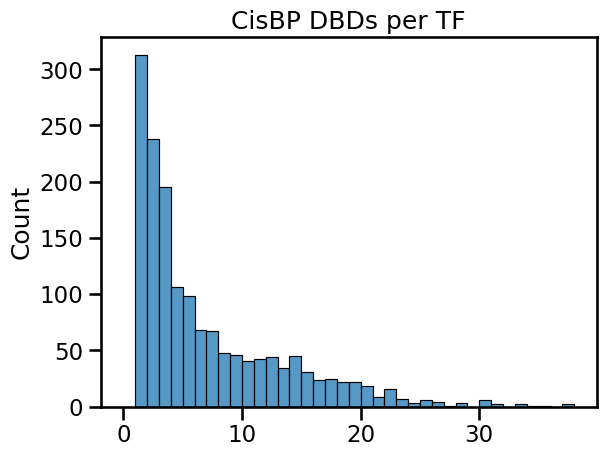

In [129]:
num_DBDs = [len(_) for _ in all_lambert_TFs_DBD_coords.dropna()["DBD_coords"]]
sns.histplot(num_DBDs, bins = np.arange(max(num_DBDs)))
plt.title("CisBP DBDs per TF");

In [132]:
all_lambert_TFs_DBD_coords["DBD_coords"][0]
# Looks like there's overlaps
# Now, need to aggregate

[(221, 243),
 (249, 271),
 (277, 299),
 (305, 327),
 (333, 355),
 (361, 383),
 (389, 411),
 (417, 439),
 (445, 467),
 (473, 495),
 (255, 271),
 (473, 482),
 (361, 375),
 (249, 258),
 (361, 371),
 (473, 488),
 (361, 370),
 (473, 483)]

In [133]:
all_lambert_TFs_DBD_coords["DBD_coords"]

0       [(221, 243), (249, 271), (277, 299), (305, 327...
1                                [(114, 182), (262, 347)]
2       [(344, 366), (288, 310), (260, 282), (372, 394...
3                                    [(1, 329), (1, 330)]
4       [(420, 442), (364, 386), (448, 469), (392, 414...
                              ...                        
1608                                 [(32, 83), (31, 83)]
1609    [(529, 538), (277, 299), (445, 467), (473, 495...
1610    [(583, 595), (1015, 1027), (1450, 1462), (584,...
1611    [(272, 317), (442, 496), (534, 584), (633, 685...
1612    [(138, 182), (107, 182), (79, 182), (69, 182),...
Name: DBD_coords, Length: 1613, dtype: object

In [134]:
#https://www.geeksforgeeks.org/merging-intervals/
def mergeOverlap(arr):
    n = len(arr)

    arr.sort()
    res = []

    # Checking for all possible overlaps
    for i in range(n):
        start = arr[i][0]
        end = arr[i][1]

        # Skipping already merged intervals
        if res and res[-1][1] >= end:
            continue

        # Find the end of the merged range
        for j in range(i + 1, n):
            if arr[j][0] <= end:
                end = max(end, arr[j][1])
        res.append([start, end])
    
    return res


In [139]:
# Merging intervals
merged_intervals = []

for intervals in all_lambert_TFs_DBD_coords["DBD_coords"]:
    if type(intervals) == float:
        merged_intervals.append(None)
    else:
        merged_intervals.append(mergeOverlap(intervals))

all_lambert_TFs_DBD_coords["DBD_coords_merged"] = merged_intervals
all_lambert_TFs_DBD_coords

,id,ProteinSeq,DBD_coords,DBD_coords_merged
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,"[(221, 243), (249, 258), (249, 271), (255, 271...","[[221, 243], [249, 271], [277, 299], [305, 327..."
1,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFGPLTTPT...,"[(114, 182), (262, 347)]","[[114, 182], [262, 347]]"
2,sp|A0PJY2|FEZF1_HUMAN Fez family zinc finger p...,MDSSCHNATTKMLATAPARGNMMSTSKPLAFSIERIMARTPEPKAL...,"[(260, 282), (288, 310), (294, 310), (316, 338...","[[260, 282], [288, 310], [316, 338], [344, 366..."
3,sp|A1A519|F170A_HUMAN Protein FAM170A OS=Homo ...,MKRRQKRKHLENEESQETAEKGGGMSKSQEDALQPGSTRVAKGWSQ...,"[(1, 329), (1, 330)]","[[1, 330]]"
4,sp|A1YPR0|ZBT7C_HUMAN Zinc finger and BTB doma...,MANDIDELIGIPFPNHSSEVLCSLNEQRHDGLLCDVLLVVQEQEYR...,"[(364, 386), (392, 409), (392, 414), (420, 442...","[[364, 386], [392, 414], [420, 442], [448, 469]]"
...,...,...,...,...
1608,sp|Q9Y6Q9|NCOA3_HUMAN Nuclear receptor coactiv...,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...,"[(31, 83), (32, 83)]","[[31, 83]]"
1609,sp|Q9Y6R6|Z780B_HUMAN Zinc finger protein 780B...,MVHGSVTFRDVAIDFSQEEWECLQPDQRTLYRDVMLENYSHLISLG...,"[(165, 187), (193, 202), (193, 215), (221, 243...","[[165, 187], [193, 215], [221, 243], [249, 271..."
1610,sp|Q9Y6X0|SETBP_HUMAN SET-binding protein OS=H...,MESRETLSSSRQRGGESDFLPVSSAKPPAAPGCAGEPLLSTPGPGK...,"[(583, 595), (584, 596), (1015, 1027), (1450, ...","[[583, 596], [1015, 1027], [1450, 1462]]"
1611,sp|Q9Y6X8|ZHX2_HUMAN Zinc fingers and homeobox...,MASKRKSTTPCMVRTSQVVEQDVPEEVDRAKEKGIGTPQPDVAKDS...,"[(78, 101), (110, 133), (271, 317), (272, 317)...","[[78, 101], [110, 133], [271, 317], [442, 496]..."


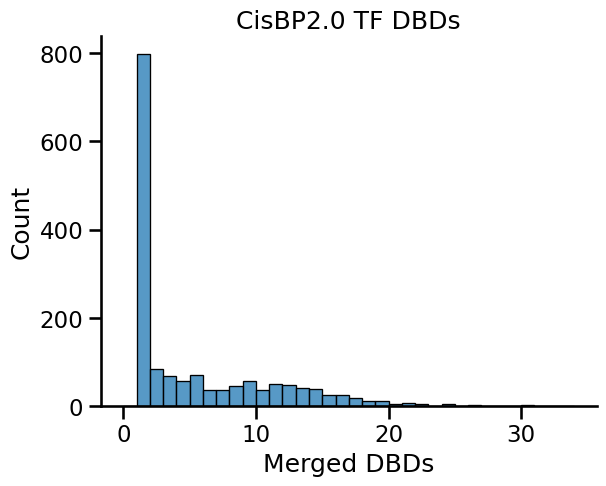

In [156]:
num_DBDs_merged = [len(_) for _ in all_lambert_TFs_DBD_coords.dropna()["DBD_coords_merged"]]
sns.histplot(num_DBDs_merged, bins = np.arange(max(num_DBDs_merged) + 1))
sns.despine()
plt.xlabel("Merged DBDs")
plt.title("CisBP2.0 TF DBDs");

In [149]:
final_DBD_coords = all_lambert_TFs_DBD_coords[["id", "ProteinSeq", "DBD_coords_merged"]]
final_DBD_coords

,id,ProteinSeq,DBD_coords_merged
0,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDMAEA...,"[[221, 243], [249, 271], [277, 299], [305, 327..."
1,sp|A0AVK6|E2F8_HUMAN Transcription factor E2F8...,MENEKENLFCEPHKRGLMKTPLKESTTANIVLAEIQPDFGPLTTPT...,"[[114, 182], [262, 347]]"
2,sp|A0PJY2|FEZF1_HUMAN Fez family zinc finger p...,MDSSCHNATTKMLATAPARGNMMSTSKPLAFSIERIMARTPEPKAL...,"[[260, 282], [288, 310], [316, 338], [344, 366..."
3,sp|A1A519|F170A_HUMAN Protein FAM170A OS=Homo ...,MKRRQKRKHLENEESQETAEKGGGMSKSQEDALQPGSTRVAKGWSQ...,"[[1, 330]]"
4,sp|A1YPR0|ZBT7C_HUMAN Zinc finger and BTB doma...,MANDIDELIGIPFPNHSSEVLCSLNEQRHDGLLCDVLLVVQEQEYR...,"[[364, 386], [392, 414], [420, 442], [448, 469]]"
...,...,...,...
1608,sp|Q9Y6Q9|NCOA3_HUMAN Nuclear receptor coactiv...,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...,"[[31, 83]]"
1609,sp|Q9Y6R6|Z780B_HUMAN Zinc finger protein 780B...,MVHGSVTFRDVAIDFSQEEWECLQPDQRTLYRDVMLENYSHLISLG...,"[[165, 187], [193, 215], [221, 243], [249, 271..."
1610,sp|Q9Y6X0|SETBP_HUMAN SET-binding protein OS=H...,MESRETLSSSRQRGGESDFLPVSSAKPPAAPGCAGEPLLSTPGPGK...,"[[583, 596], [1015, 1027], [1450, 1462]]"
1611,sp|Q9Y6X8|ZHX2_HUMAN Zinc fingers and homeobox...,MASKRKSTTPCMVRTSQVVEQDVPEEVDRAKEKGIGTPQPDVAKDS...,"[[78, 101], [110, 133], [271, 317], [442, 496]..."


In [151]:
final_DBD_coords.to_csv("../output/lambert_TFs_10-21-24_with_DBD_coords.csv")